# Eksploracyjna analiza danych (EDA)

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

DATA_DIR = Path("data")

df_daily = pd.read_csv(DATA_DIR/'wroclaw_daily.csv',parse_dates=['time'], index_col='time')
df_hourly = pd.read_csv(DATA_DIR/'wroclaw.csv',parse_dates=['time'], index_col='time')
# df_hourly = pd.read_csv(DATA_DIR/'legnica.csv',parse_dates=['time'], index_col='time')
# df_hourly = pd.read_csv(DATA_DIR/'opole.csv',parse_dates=['time'], index_col='time')
# df_hourly = pd.read_csv(DATA_DIR/'poznan.csv',parse_dates=['time'], index_col='time')
# df_hourly = pd.read_csv(DATA_DIR/'klodzko.csv',parse_dates=['time'], index_col='time')

### Dane godzinowe

In [14]:
df_hourly.tail()

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco,year
time,,,,,,,,,,,,
2025-12-30 20:00:00,-2.0,74.0,0.0,NaN,290.0,28.0,31.5,1018.0,NaN,5.0,2.0,2025
2025-12-30 21:00:00,-3.0,80.0,0.0,NaN,290.0,26.0,33.3,1018.0,NaN,5.0,2.0,2025
2025-12-30 22:00:00,-3.0,80.0,0.0,NaN,290.0,26.0,33.3,1018.0,NaN,2.0,2.0,2025
2025-12-30 23:00:00,-3.0,80.0,0.0,NaN,290.0,26.0,33.3,1018.0,NaN,2.0,2.0,2025
2025-12-31 00:00:00,-3.3,81.0,0.0,NaN,280.0,14.0,33.3,1019.0,NaN,0.0,1.0,2025


#### Znaczenie kolumn:

| Kolumna | Znaczenie | Wartości / Jednostka |
| --- | --- | --- |
| **temp** | Temperatura powietrza | °C |
| **rhum** | Wilgotność względna | % |
| **prcp** | Opady (godzinowa suma) | mm |
| **snwd** | Głębokość pokrywy śnieżnej | mm |
| **wdir** | Kierunek wiatru | stopnie (0-360°) |
| **wspd** | Średnia prędkość wiatru | km/h |
| **wpgt** | Szczytowy poryw wiatru | km/h |
| **pres** | Ciśnienie atmosferyczne (na poz. morza) | hPa |
| **tsun** | Czas nasłonecznienia w danej godzinie | minuty |
| **cldc** | Zachmurzenie ogólne | 0d 0 do 8 |
| **coco** | Kod warunków pogodowych (Condition Code) | kody liczbowe (np. 1 = Clear, 3 = Cloudy, 14 = Thunderstorm) |

In [3]:
print(df_hourly['coco'].unique())
print(df_hourly['cldc'].unique())

[nan  7. 21. 14. 12.  5. 17.  8. 10. 15. 16. 25. 18.  9.  4.  3.  2.  1.
 24. 27. 26. 23.  0. 19.  6. 22. 13. 11.]
[nan  8.  6.  2.  0.  1.  4.  7.  3.  5.]


#### Braki

In [17]:
idx = df_hourly.index.sort_values()

expected = pd.date_range(
    start=idx.min(),
    end=idx.max(),
    freq='h'
)

missing = expected.difference(idx)
extra = idx.difference(expected)

len(missing), len(extra), missing

(12,
 0,
 DatetimeIndex(['2015-04-02 00:00:00', '2015-04-02 01:00:00',
                '2015-04-02 02:00:00', '2015-05-01 17:00:00',
                '2015-05-03 17:00:00', '2015-07-27 01:00:00',
                '2015-09-19 13:00:00', '2015-09-19 14:00:00',
                '2015-09-19 15:00:00', '2016-01-15 23:00:00',
                '2018-04-11 16:00:00', '2018-04-11 17:00:00'],
               dtype='datetime64[ns]', freq=None))

In [4]:
print(df_hourly.isna().mean() * 100)

temp      0.000000
rhum      0.001037
prcp     67.782896
snwd     99.808083
wdir      0.236524
wspd      0.001037
wpgt     32.534545
pres      0.102701
tsun    100.000000
cldc      2.716918
coco     26.904643
dtype: float64


- `tsun` nie jest zbierane na stacji wroclaw
- `snwd` prawdopodobnie jest często NaN, bo rzadko jest śnieg we Wrocławiu (czyli Nan <- 0)
- `coco` wygląda na coś co wpisuje człowiek człowiek, albo jest produkowane na podstawie innych kolumn (TODO można wypełnić na podstawie podobnych dni)
- `prcp` zaczęli rejestrować w 2022 - dosyć problematyczne dla prognozy deszczu
- `wpgt` podobnie - jest od 2018

In [5]:
df_hourly["year"] = df_hourly.index.year

df_hourly.groupby("year")[df_hourly.columns].apply(
    lambda x: x.isna().mean() * 100
)

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco,year
year,,,,,,,,,,,,
2015,0.0,0.000000,100.000000,100.000000,0.720000,0.000000,100.000000,1.062857,100.0,2.617143,98.148571,0.0
2016,0.0,0.000000,100.000000,100.000000,1.001936,0.011386,100.000000,0.022771,100.0,1.093021,80.621655,0.0
2017,0.0,0.000000,100.000000,100.000000,0.662100,0.000000,100.000000,0.034247,100.0,1.187215,81.324201,0.0
2018,0.0,0.000000,100.000000,99.817310,0.216945,0.000000,54.875542,0.011418,100.0,1.632793,33.763416,0.0
2019,0.0,0.000000,100.000000,99.783105,0.000000,0.000000,0.000000,0.000000,100.0,0.833333,0.000000,0.0
2020,0.0,0.000000,100.000000,99.943078,0.000000,0.000000,0.000000,0.000000,100.0,8.595173,0.000000,0.0
2021,0.0,0.000000,100.000000,99.337900,0.000000,0.000000,0.000000,0.000000,100.0,7.420091,0.000000,0.0
2022,0.0,0.011416,39.954338,99.783105,0.000000,0.000000,3.002283,0.000000,100.0,6.472603,2.111872,0.0
2023,0.0,0.000000,0.000000,99.657534,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.0


In [6]:
df_hourly.index[df_hourly["prcp"].notna()].min()

Timestamp('2022-05-26 20:00:00')

### Dane dzienne

In [7]:
df_daily.tail()

,temp,tmin,tmax,rhum,prcp,snwd,wspd,wpgt,pres,tsun,cldc
time,,,,,,,,,,,
2025-12-27,-1.0,-2.3,1.0,92,0.1,NaN,20.2,35.2,1027.1,NaN,6.0
2025-12-28,0.2,-2.0,2.3,86,0.0,NaN,21.6,33.3,1024.7,NaN,3.0
2025-12-29,0.2,-3.0,2.0,91,0.1,NaN,22.5,35.2,1016.0,NaN,4.0
2025-12-30,-0.9,-3.0,1.0,74,0.4,NaN,25.2,42.6,1016.3,NaN,3.0
2025-12-31,-2.0,-4.0,1.0,88,0.2,NaN,17.9,33.3,1013.9,NaN,4.0


Znaczenie kolumn:

|kolumna|znaczenie|
|-------|---------|
|**temp**| Średnia temperatura dobowa (°C) |
|**tmin**| Minimalna temperatura (°C) |
|**tmax**| Maksymalna temperatura (°C) |
|**rhum**| Wilgotność względna (%) |
|**prcp**| Dobowa suma opadów (mm) |
|**wspd**| Średnia prędkość wiatru (km/h) |
|**wpgt**| Najsilniejszy poryw wiatru (km/h) |
|**pres**| Ciśnienie atmosferyczne na poziomie morza (hPa) |
|**cldc**| Średnie zachmurzenie (%) |

#### Braki

In [18]:
idx = df_daily.index.sort_values()

expected = pd.date_range(
    start=idx.min(),
    end=idx.max(),
    freq='D'
)

missing = expected.difference(idx)
extra = idx.difference(expected)

len(missing), len(extra), missing

(0, 0, DatetimeIndex([], dtype='datetime64[ns]', freq='D'))

In [8]:
print(df_daily.isna().mean() * 100)


temp      0.000000
tmin      0.074664
tmax      0.174216
rhum      0.000000
prcp     45.121951
snwd     97.735192
wspd      0.000000
wpgt     32.553509
pres      0.149328
tsun    100.000000
cldc      6.022897
dtype: float64


In [9]:
df_daily["year"] = df_daily.index.year

df_daily.groupby("year")[df_daily.columns].apply(
    lambda x: x.isna().mean() * 100
)

,temp,tmin,tmax,rhum,prcp,snwd,wspd,wpgt,pres,tsun,cldc,year
year,,,,,,,,,,,,
2015,0.0,0.273973,1.369863,0.0,36.164384,96.438356,0.0,100.000000,1.643836,100.0,5.479452,0.0
2016,0.0,0.273224,0.273224,0.0,71.857923,97.267760,0.0,100.000000,0.000000,100.0,2.732240,0.0
2017,0.0,0.000000,0.000000,0.0,72.054795,96.438356,0.0,100.000000,0.000000,100.0,3.013699,0.0
2018,0.0,0.273973,0.273973,0.0,73.698630,99.452055,0.0,55.068493,0.000000,100.0,3.835616,0.0
2019,0.0,0.000000,0.000000,0.0,69.315068,98.356164,0.0,0.000000,0.000000,100.0,2.191781,0.0
2020,0.0,0.000000,0.000000,0.0,71.038251,99.453552,0.0,0.000000,0.000000,100.0,17.213115,0.0
2021,0.0,0.000000,0.000000,0.0,70.958904,95.890411,0.0,0.000000,0.000000,100.0,18.356164,0.0
2022,0.0,0.000000,0.000000,0.0,26.575342,98.904110,0.0,3.013699,0.000000,100.0,13.424658,0.0
2023,0.0,0.000000,0.000000,0.0,0.000000,96.164384,0.0,0.000000,0.000000,100.0,0.000000,0.0


- `wpgt` - jak w godzinowych: nie ma przed 2018
- `snwd` - we wrocławiu zwykle nie ma śniegu
- `tsun` - w ogóle nie rejestrują
- `prcp` - deszcz przed 2022 pewnie wpisywany ręcznie, stąd braki. Natomiast tutaj założenie że jak nie pada to nie wpisali może być już całkiem niezłe

In [10]:
# len(df_daily.index[df_daily["prcp"].isna()]), len(df_daily.index[df_daily["prcp"]==0]), len(df_daily)
df_old_records = df_daily.loc["2019-01-01":"2022-12-31"]
df_new_records = df_daily.loc["2023-01-01":"2025-12-31"]
print("new records: rainy days ratio:",1 - ((len(df_new_records.index[df_new_records["prcp"].isna()]) + len(df_new_records.index[df_new_records["prcp"]==0])) / len(df_new_records)))
print("old records: rainy days ratio:", 1 - ((len(df_old_records.index[df_old_records["prcp"].isna()]) + len(df_old_records.index[df_old_records["prcp"]==0])) / len(df_old_records)))

new records: rainy days ratio: 0.46441605839416056
old records: rainy days ratio: 0.14784394250513344


W czasach z których dane są kompletne (od 2023) mamy 46% dni z deszczem,
a w czasach wcześniejszych mamy 15% dni z deszczem.
Czyli uzupełnienie zerami to słaby pomysł.

## Wizualizacja: temperatura

### Sezonowość roczna

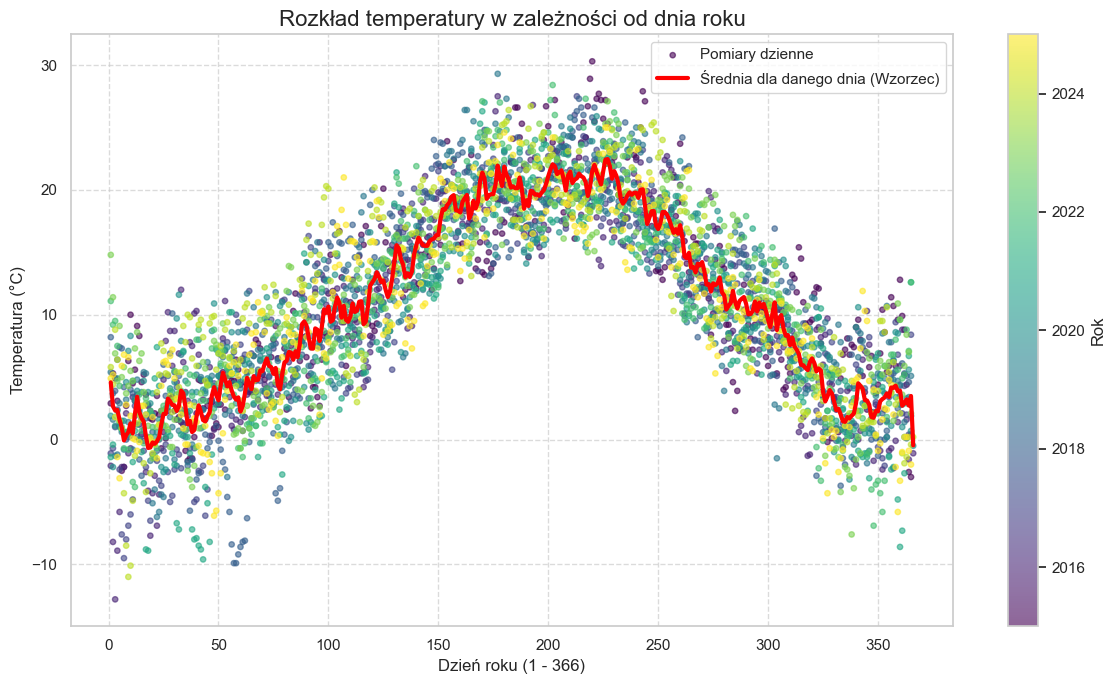

In [11]:
plt.figure(figsize=(12, 7))

df_daily['day_of_year'] = df_daily.index.dayofyear
df_daily['year'] = df_daily.index.year
# Oś X: Numer dnia w roku (1 = 1 stycznia, 365 = 31 grudnia)
# Oś Y: Temperatura
# Kolor (hue): Rok
scatter = plt.scatter(
    df_daily['day_of_year'],
    df_daily['temp'],
    c=df_daily['year'],
    cmap='viridis', # od fioletu (stare lata) do żółtego (nowe lata)
    s=15,
    alpha=0.6,
    label='Pomiary dzienne'
)

# Obliczamy średnią temperaturę dla każdego z 366 dni w roku
daily_means = df_daily.groupby('day_of_year')['temp'].mean()

plt.plot(
    daily_means.index,
    daily_means.values,
    color='red',
    linewidth=3,
    label='Średnia dla danego dnia (Wzorzec)'
)

plt.title('Rozkład temperatury w zależności od dnia roku', fontsize=16)
plt.xlabel('Dzień roku (1 - 366)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Rok')

plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(DATA_DIR/'wykres_sezonowosc_prosty.png')
plt.show()


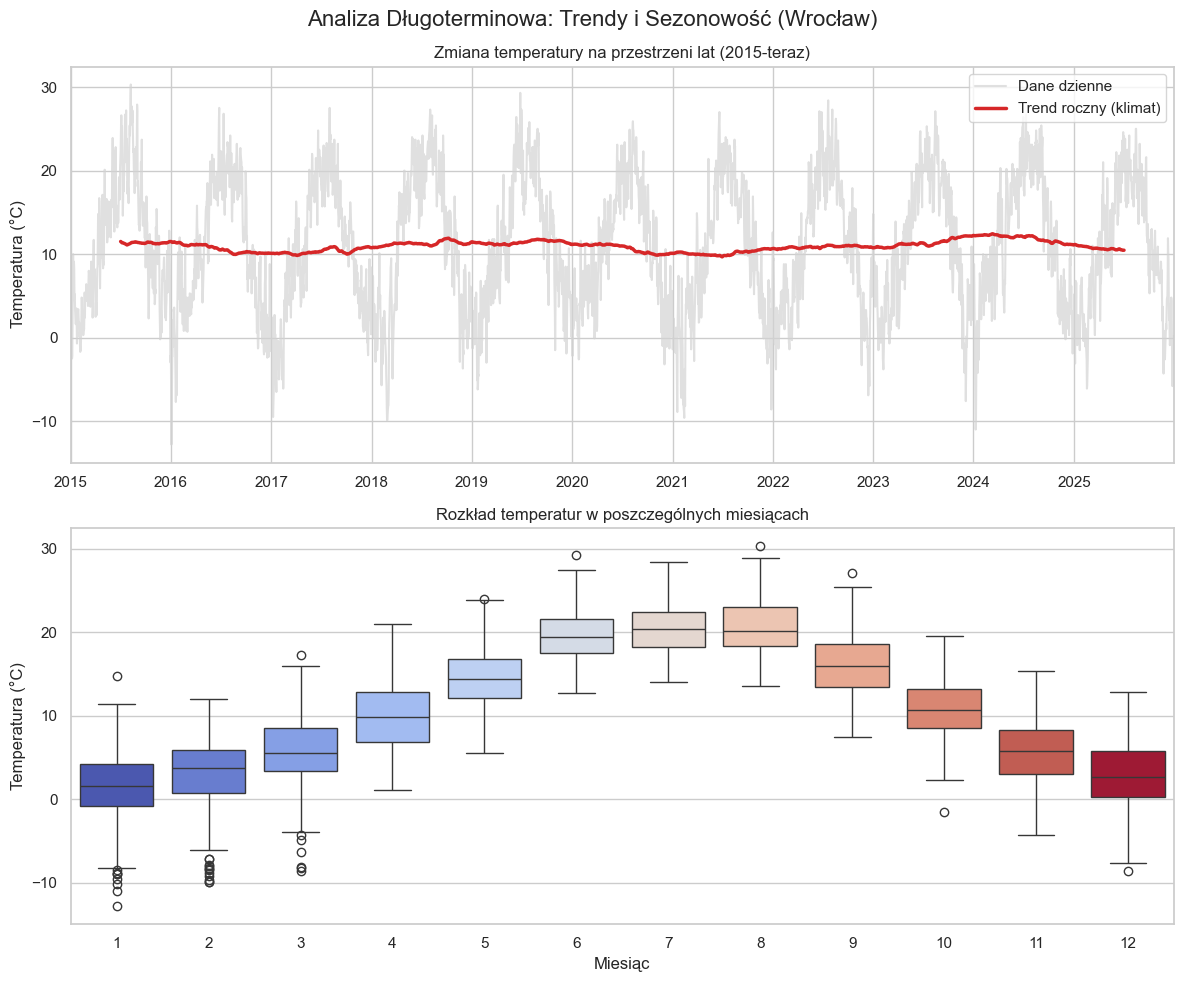

In [13]:
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig2.suptitle('Analiza Długoterminowa: Trendy i Sezonowość (Wrocław)', fontsize=16)

# Wykres 1.1: Trend wieloletni (Rolling Average)
ax1.plot(df_daily.index, df_daily['temp'], color='lightgray', alpha=0.7, label='Dane dzienne')
# Rysujemy średnią kroczącą roczną (365 dni) - pokazuje zmianę klimatu
df_daily['rolling_year'] = df_daily['temp'].rolling(window=365, center=True).mean()
ax1.plot(df_daily.index, df_daily['rolling_year'], color='#d62728', linewidth=2.5, label='Trend roczny (klimat)')

ax1.set_title('Zmiana temperatury na przestrzeni lat (2015-teraz)')
ax1.set_ylabel('Temperatura (°C)')
ax1.legend()
ax1.set_xlim(df_daily.index.min(), df_daily.index.max())

# Wykres 1.2: Rozkład temperatur w miesiącach (Boxplot)
sns.boxplot(x=df_daily.index.month, y='temp', data=df_daily, ax=ax2, palette="coolwarm", hue=df_daily.index.month, legend=False)
ax2.set_title('Rozkład temperatur w poszczególnych miesiącach')
ax2.set_xlabel('Miesiąc')
ax2.set_ylabel('Temperatura (°C)')

plt.tight_layout()
plt.savefig(DATA_DIR / 'wykres_trendy_roczne.png')


- Widać trend sezonowy, tak jak się można dla temperatury spodziewać - zimą zimno, latem cieplej.
- Nie ma trendu długoterminowego ("globalnego ocieplenia" ani ochłodzenia)
- W miesiącach zimowych trochę więcej outlierów (dni wyjątkowo zimnych)

### Cykl dobowy

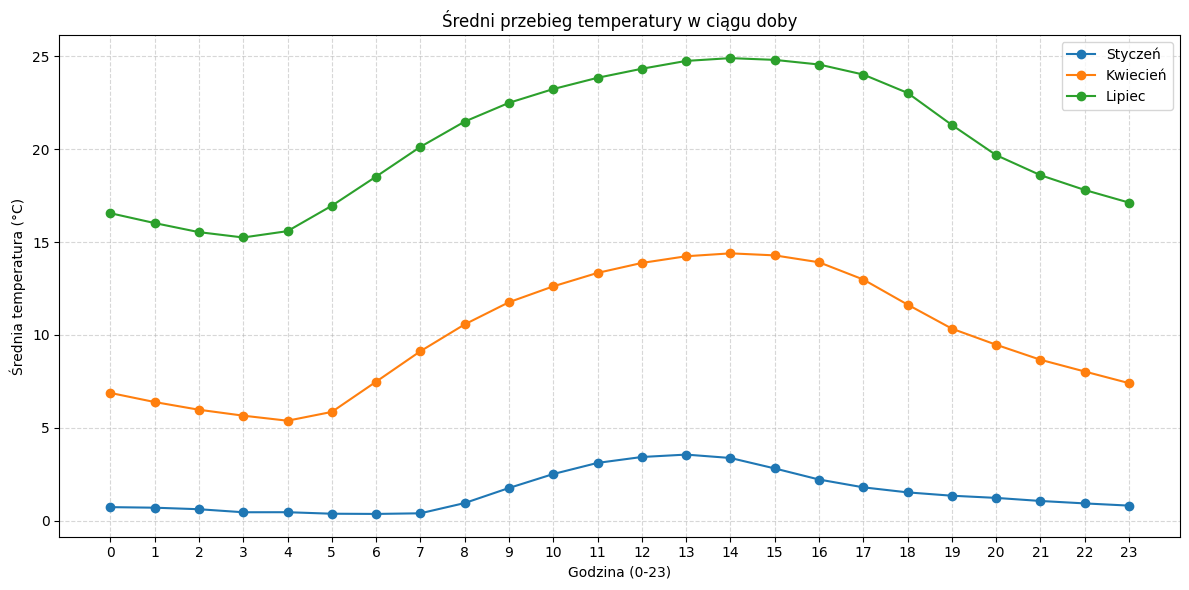

In [ ]:
fig2, ax3 = plt.subplots(figsize=(12, 6))

df_hourly["month"] = df_hourly.index.month
df_hourly["hour"] = df_hourly.index.hour

hourly_avg = (
    df_hourly
    .groupby(["month", "hour"])["temp"]
    .mean()
    .reset_index()
)

winter_day = hourly_avg[hourly_avg["month"] == 1]
spring_day = hourly_avg[hourly_avg["month"] == 4]
summer_day = hourly_avg[hourly_avg["month"] == 7]

ax3.plot(winter_day["hour"], winter_day["temp"], "o-", label="Styczeń")
ax3.plot(spring_day["hour"], spring_day["temp"], "o-", label="Kwiecień")
ax3.plot(summer_day["hour"], summer_day["temp"], "o-", label="Lipiec")
ax3.set_title("Średni przebieg temperatury w ciągu doby")
ax3.set_xlabel("Godzina (0-23)")
ax3.set_ylabel("Średnia temperatura (°C)")
ax3.set_xticks(range(0, 24))
ax3.grid(True, linestyle="--", alpha=0.5)
ax3.legend()

plt.tight_layout()
plt.savefig(DATA_DIR / 'wykres_cykle_godzinowe.png')

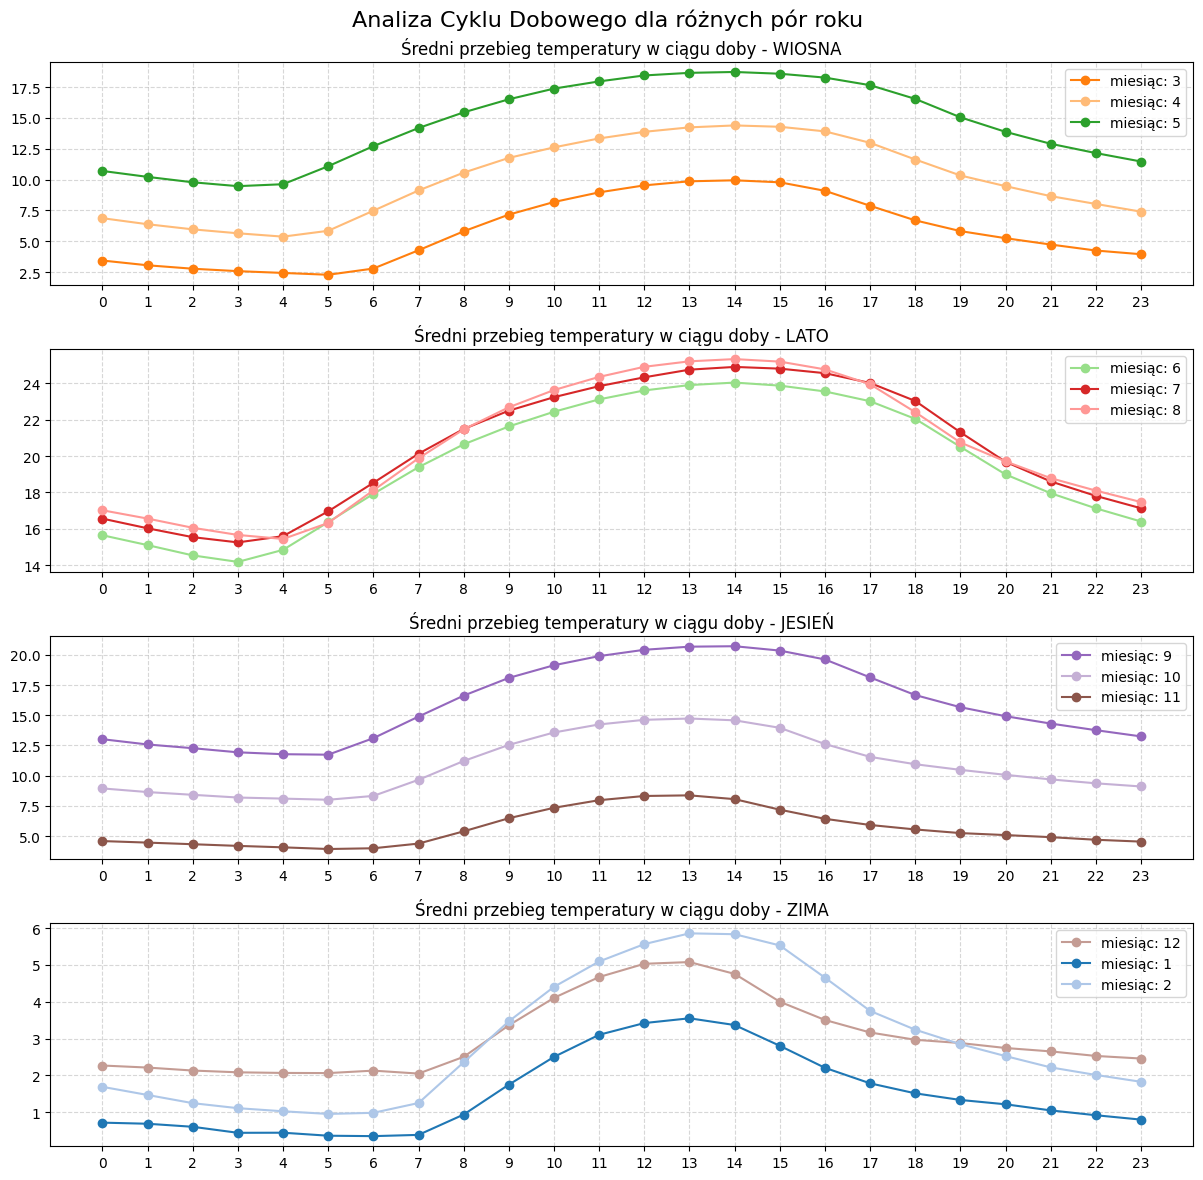

In [ ]:
fig3, (ax4, ax5, ax6, ax7) = plt.subplots(4, 1, figsize=(12, 12))
fig3.suptitle('Analiza Cyklu Dobowego dla różnych pór roku', fontsize=16)

cmap = plt.get_cmap("tab20")
for i in [3,4,5]:
    ax4.plot(
        hourly_avg.loc[hourly_avg["month"] == i, "hour"],
        hourly_avg.loc[hourly_avg["month"] == i, "temp"],
        "o-",
        color=cmap(i - 1),
        label=f"miesiąc: {i}"
    )
ax4.set_title("Średni przebieg temperatury w ciągu doby - WIOSNA")
ax4.legend()
ax4.set_xticks(range(0, 24))
ax4.grid(True, linestyle="--", alpha=0.5)

for i in [6,7,8]:
    ax5.plot(
        hourly_avg.loc[hourly_avg["month"] == i, "hour"],
        hourly_avg.loc[hourly_avg["month"] == i, "temp"],
        "o-",
        color=cmap(i - 1),
        label=f"miesiąc: {i}"
    )
ax5.set_title("Średni przebieg temperatury w ciągu doby - LATO")
ax5.legend()
ax5.set_xticks(range(0, 24))
ax5.grid(True, linestyle="--", alpha=0.5)

for i in [9,10,11]:
    ax6.plot(
        hourly_avg.loc[hourly_avg["month"] == i, "hour"],
        hourly_avg.loc[hourly_avg["month"] == i, "temp"],
        "o-",
        color=cmap(i - 1),
        label=f"miesiąc: {i}"
    )
ax6.set_title("Średni przebieg temperatury w ciągu doby - JESIEŃ")
ax6.legend()
ax6.set_xticks(range(0, 24))
ax6.grid(True, linestyle="--", alpha=0.5)

for i in [12,1,2]:
    ax7.plot(
        hourly_avg.loc[hourly_avg["month"] == i, "hour"],
        hourly_avg.loc[hourly_avg["month"] == i, "temp"],
        "o-",
        color=cmap(i - 1),
        label=f"miesiąc: {i}"
    )
ax7.set_title("Średni przebieg temperatury w ciągu doby - ZIMA")
ax7.legend()
ax7.set_xticks(range(0, 24))
ax7.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()



- Latem większe różnice między dniem a nocą
- Można zauważyć zmianę czasu: kwiecień-sierpień najcieplej koło 14, październik-luty najcieplej koło 13

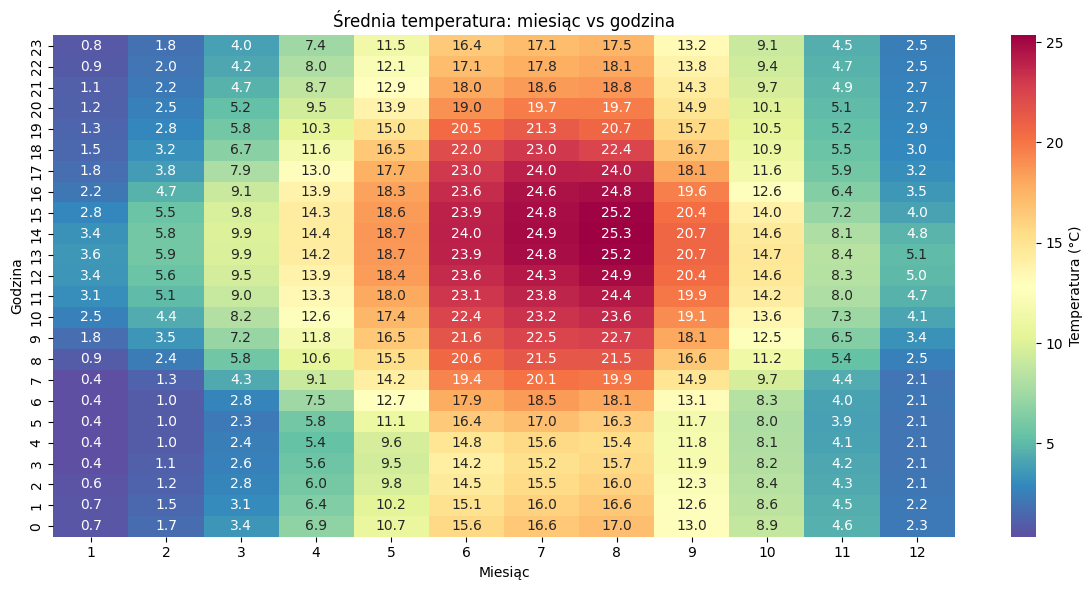

In [ ]:
fig4, ax8 = plt.subplots(figsize=(12, 6))

pivot_table = df_hourly.pivot_table(
    values="temp",
    index="hour",
    columns="month",
    aggfunc="mean"
)

sns.heatmap(
    pivot_table,
    ax=ax8,
    cmap="Spectral_r",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Temperatura (°C)"}
)

ax8.set_title("Średnia temperatura: miesiąc vs godzina")
ax8.set_xlabel("Miesiąc")
ax8.set_ylabel("Godzina")
ax8.invert_yaxis()

plt.tight_layout()

## Wizualizacja: deszcz

1. Widać że w latach gdzie dużo NaN jest mniej deszczu - więc NaN raczej nie oznacza braku deszczu.
Do dalszej analizy opadów bierzemy od 2022-05-26 (wtedy pojawiają się regularne wpisy w danych godzinowych)
2. Częstość i ilość deszczu vs miesiąc -> latem (lipec, sierpień, wrzesień) pada najintensywniej;
zimą i jesienią (listopad-luty) mniej intensywnie ale częściej. W sumie spodziewane.
3. Częściej pada w dzień niż w nocy
4. Nie widać wyraźnych trendów globalnych

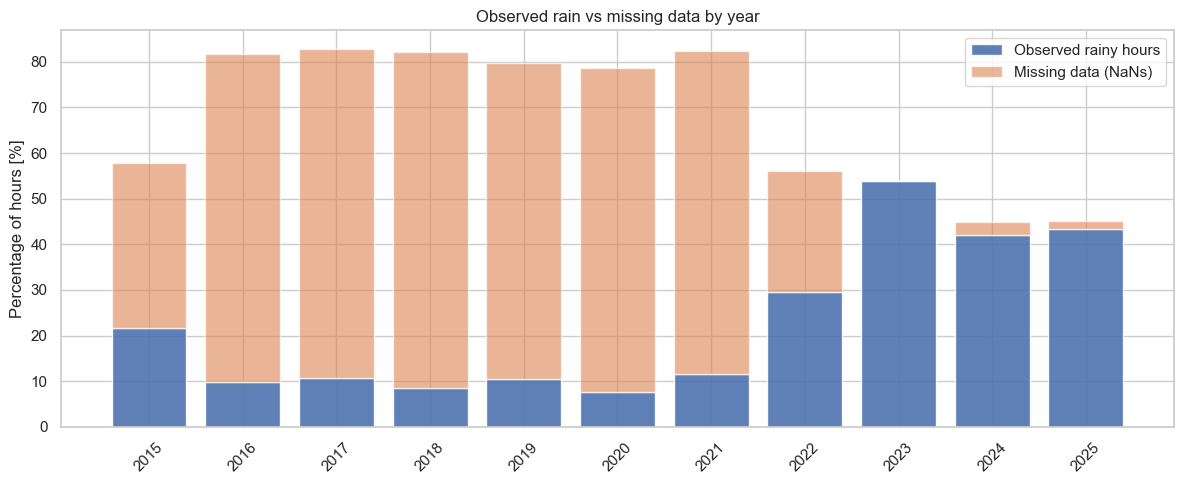

In [ ]:
rainy_hours_pct = (
    df_daily["prcp"].groupby(df_daily.index.year).apply(lambda x: (x > 0).mean() * 100)
)

nan_counts = (
    df_daily["prcp"].groupby(df_daily.index.year).apply(lambda x: x.isna().mean() * 100)
)

plt.figure(figsize=(12, 5))

plt.bar(rainy_hours_pct.index, rainy_hours_pct, label="Observed rainy hours", alpha=0.9)

plt.bar(
    nan_counts.index,
    nan_counts,
    bottom=rainy_hours_pct,
    label="Missing data (NaNs)",
    alpha=0.6,
)

plt.ylabel("Percentage of hours [%]")
plt.title("Observed rain vs missing data by year")
plt.xticks(rainy_hours_pct.index, rainy_hours_pct.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

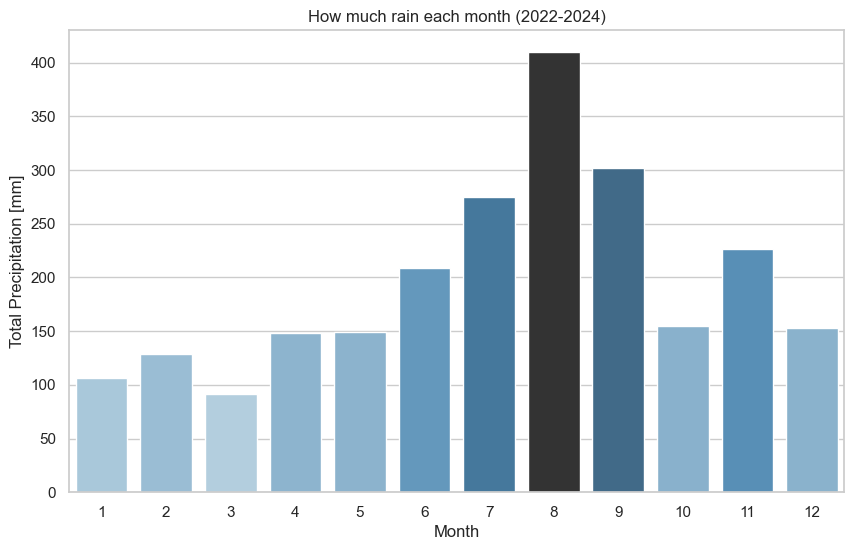

In [ ]:
# Filter data (taking data from 2022 onwards)
df_rain = df_hourly.loc["2022-05-26":].copy()
df_rain["month"] = df_rain.index.month
df_rain["hour"] = df_rain.index.hour

# Total Rainfall by Month
plt.figure(figsize=(10, 6))
monthly_rain = df_rain.groupby("month")["prcp"].sum()

sns.barplot(
    x=monthly_rain.index,
    y=monthly_rain.values,
    hue=monthly_rain.values,
    palette="Blues_d",
    legend=False,
)
plt.title("How much rain each month (2022-2024)")
plt.xlabel("Month")
plt.ylabel("Total Precipitation [mm]")
plt.show()

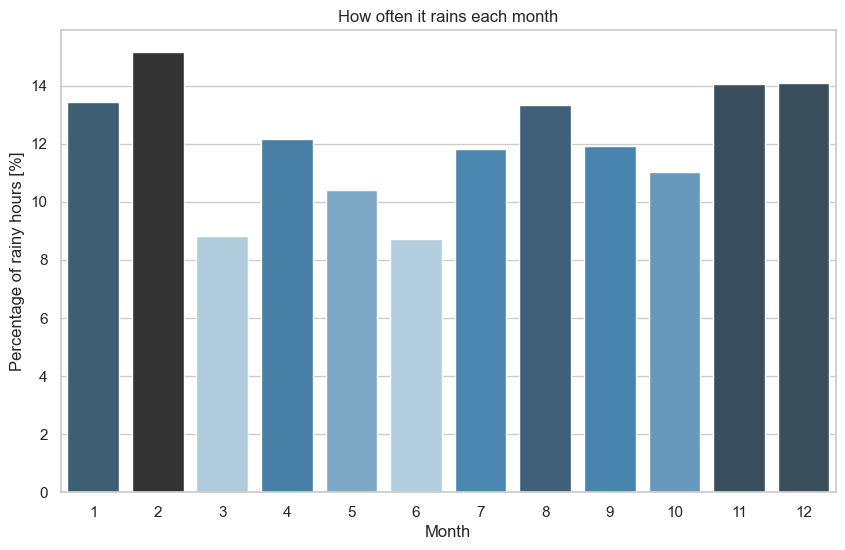

In [ ]:
# How often it rains each month
plt.figure(figsize=(10, 6))
monthly_rain = (df_rain["prcp"] > 0).groupby(df_rain["month"]).mean() * 100
sns.barplot(
    x=monthly_rain.index,
    y=monthly_rain.values,
    hue=monthly_rain.values,
    palette="Blues_d",
    legend=False,
)
plt.title("How often it rains each month")
plt.xlabel("Month")
plt.ylabel("Percentage of rainy hours [%]")
plt.show()

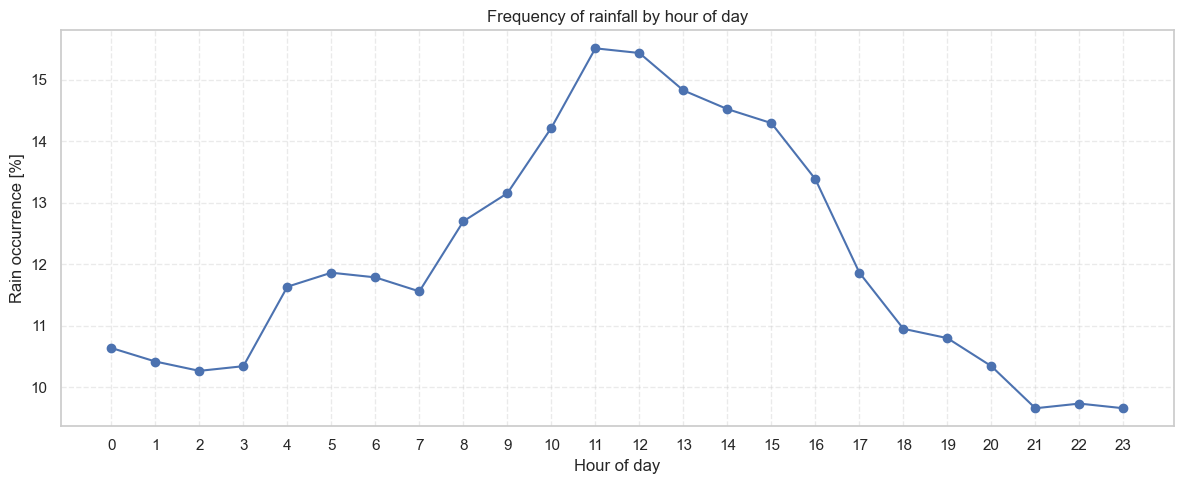

In [ ]:
hourly_rain_freq = (df_rain["prcp"] > 0).groupby(df_rain["hour"]).mean() * 100

plt.figure(figsize=(12, 5))

plt.plot(hourly_rain_freq.index, hourly_rain_freq, marker="o")

plt.xticks(range(0, 24))
plt.xlabel("Hour of day")
plt.ylabel("Rain occurrence [%]")
plt.title("Frequency of rainfall by hour of day")
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

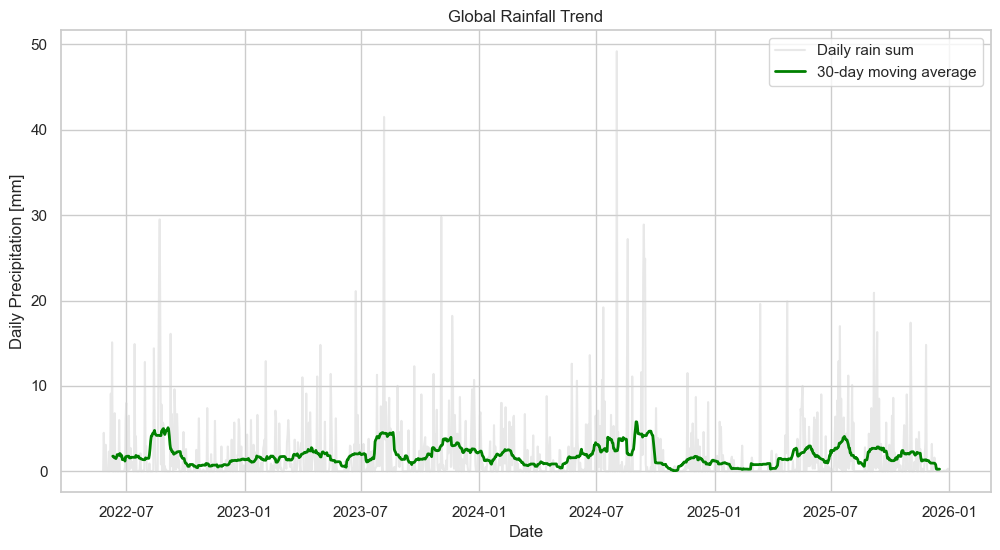

In [ ]:
# Global Trend
plt.figure(figsize=(12, 6))

daily_rain = df_rain["prcp"].resample("D").sum()
rolling_rain = daily_rain.rolling(window=30, center=True).mean()

sns.lineplot(
    x=daily_rain.index,
    y=daily_rain,
    color="lightgray",
    label="Daily rain sum",
    alpha=0.5,
)
sns.lineplot(
    x=rolling_rain.index,
    y=rolling_rain,
    color="green",
    linewidth=2,
    label="30-day moving average",
)

plt.title("Global Rainfall Trend")
plt.xlabel("Date")
plt.ylabel("Daily Precipitation [mm]")
plt.legend()
plt.show()